## Deep Learning

Using tensorflow and the MNIST dataset, compare the performance of differents NN architectures.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import matplotlib.pyplot as plt

# tensorflow version
print('tensorflow version:')
print(tf.__version__)

tensorflow version:
2.0.0-alpha0


In [2]:
# Import the mnist dataset
mnist = tf.keras.datasets.mnist

# Load the mnist dataset and preprocess it
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add a channels dimension
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

In [3]:
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

In [4]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.conv1(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

model = MyModel()

In [5]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()

optimizer = tf.keras.optimizers.Adam()

In [6]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [7]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [8]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [9]:
EPOCHS = 5

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print (template.format(epoch+1,
                         train_loss.result(),
                         train_accuracy.result()*100,
                         test_loss.result(),
                         test_accuracy.result()*100))

Epoch 1, Loss: 0.12812109291553497, Accuracy: 96.13166809082031, Test Loss: 0.05967067554593086, Test Accuracy: 98.0199966430664
Epoch 2, Loss: 0.08333634585142136, Accuracy: 97.48250579833984, Test Loss: 0.06561493128538132, Test Accuracy: 97.89999389648438
Epoch 3, Loss: 0.06162169575691223, Accuracy: 98.13111114501953, Test Loss: 0.06858090311288834, Test Accuracy: 97.87667083740234
Epoch 4, Loss: 0.04916425421833992, Accuracy: 98.507080078125, Test Loss: 0.0673288032412529, Test Accuracy: 98.00999450683594
Epoch 5, Loss: 0.04145214334130287, Accuracy: 98.73300170898438, Test Loss: 0.0790666937828064, Test Accuracy: 97.80400085449219


### Network Architecture: Model 1 (1 Hidden Layer)
1 Hidden Layer: 256 neurons, activation function=RELU
Optimization algorithm: SGD, Loss: Categorical Cross Entropy, Metric: Accuracy

In [3]:
# Define your network architecture.
model2 = tf.keras.models.Sequential([
  # Input Layer
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # Hidden Layer
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  # Output Layer
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Configure the model for training.
model2.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Test how long it took for training model 1

In [4]:
%%time
# Train your model using the training data
history2 = model2.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 124us/sample - loss: 1.1623 - accuracy: 0.6912
Epoch 2/5
60000/60000 [==============================] - 7s 122us/sample - loss: 0.6148 - accuracy: 0.8490
Epoch 3/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.5041 - accuracy: 0.8694
Epoch 4/5
60000/60000 [==============================] - 7s 116us/sample - loss: 0.4514 - accuracy: 0.8794
Epoch 5/5
60000/60000 [==============================] - 7s 118us/sample - loss: 0.4196 - accuracy: 0.8860
Wall time: 36.3 s


In [6]:
# Evaluate your model using the test data
model2.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 96us/sample - loss: 0.3867 - accuracy: 0.8962


[0.3867468881249428, 0.8962]

### Create a third NN called 'model3' but now add one more hidden layer, and use the ADAM optimization algorithm

### Network Architecture: Model 3 (2 Hidden Layers)
1 Hidden Layer: 256 neurons, activation function=SELU, No Dropout

2 Hidden Layer: 64 neurons, activation function=SELU, No Dropout

Optimization algorithm: ADAM, Loss: Categorical Cross Entropy, Metric: Accuracy

In [7]:
# Define your network architecture.
model3 = tf.keras.models.Sequential([
  # Input Layer
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # Hidden Layer
  tf.keras.layers.Dense(256, activation=tf.nn.selu),
  #Second hidden layer
  tf.keras.layers.Dense(64, activation=tf.nn.selu),
  # Output Layer
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Configure the model for training.
model3.compile(optimizer='ADAM', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Compute how long it takes to train Model2

In [8]:
%%time
# Train your model using the training data
history3 = model3.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 155us/sample - loss: 0.2544 - accuracy: 0.9235
Epoch 2/5
60000/60000 [==============================] - 9s 153us/sample - loss: 0.1260 - accuracy: 0.9617
Epoch 3/5
60000/60000 [==============================] - 9s 153us/sample - loss: 0.0913 - accuracy: 0.9710
Epoch 4/5
60000/60000 [==============================] - 9s 157us/sample - loss: 0.0713 - accuracy: 0.9772
Epoch 5/5
60000/60000 [==============================] - 9s 155us/sample - loss: 0.0596 - accuracy: 0.9806
Wall time: 46.9 s


In [9]:
# Evaluate your model using the test data
model3.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 89us/sample - loss: 0.0876 - accuracy: 0.9751


[0.08763016198718106, 0.9751]

### Create another NN called 'model4'. Add one more hidden layer, and now use a dropout rate of 0.1 for all layers

### Network Architecture: Model 4 (3 Hidden Layers)
1 Hidden Layer: 256 neurons, activation function=SELU, Dropout rate=0.1

2 Hidden Layer: 64 neurons, activation function=SELU, Dropout rate=0.1

3 Hidden Layer: 16 neurons, activation function=SELU, Dropout rate=0.1

Optimization algorithm: ADAM, Loss: Categorical Cross Entropy, Metric: Accuracy

In [10]:
# Define your network architecture.
model4 = tf.keras.models.Sequential([
  # Input Layer
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  # Hidden Layer
  tf.keras.layers.Dense(256, activation=tf.nn.selu),
  tf.keras.layers.Dropout(0.1),
  #Second hidden layer
  tf.keras.layers.Dense(64, activation=tf.nn.selu),
  tf.keras.layers.Dropout(0.1),
  #Third hidden layer
  tf.keras.layers.Dense(16, activation=tf.nn.selu),
  tf.keras.layers.Dropout(0.1),
  # Output Layer
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Configure the model for training.
model4.compile(optimizer='ADAM', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

Calculate how long it takes to train Model4

In [11]:
%%time
# Train your model using the training data
history4 = model4.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 10s 171us/sample - loss: 0.3605 - accuracy: 0.8901
Epoch 2/5
60000/60000 [==============================] - 10s 159us/sample - loss: 0.2125 - accuracy: 0.9362
Epoch 3/5
60000/60000 [==============================] - 10s 174us/sample - loss: 0.1650 - accuracy: 0.9506
Epoch 4/5
60000/60000 [==============================] - 9s 157us/sample - loss: 0.1398 - accuracy: 0.9584
Epoch 5/5
60000/60000 [==============================] - 10s 162us/sample - loss: 0.1231 - accuracy: 0.9628
Wall time: 50.2 s


In [12]:
# Evaluate your model using the test data
model4.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 101us/sample - loss: 0.0961 - accuracy: 0.9698


[0.09613152909129859, 0.9698]

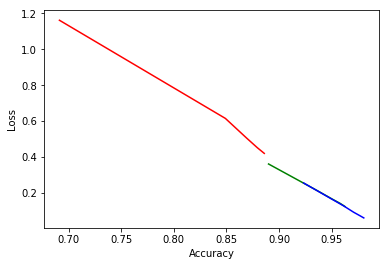

In [13]:
plt.plot(history4.history['accuracy'], history4.history['loss'], color='green')
plt.plot(history3.history['accuracy'], history3.history['loss'], color='blue')
plt.plot(history2.history['accuracy'], history2.history['loss'], color='red')
plt.xlabel('Accuracy')
plt.ylabel('Loss')
plt.show()